# Classification Exercises

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from pydataset import data

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import acquire
import prepare

plt.rc('figure', figsize=(16, 9))
plt.rc('font', size=13)

## Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = data('iris')
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### Print the first 3 rows

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### Print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

### Print the column names


In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

### Print the data type of each column

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

### Print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### No, I don't recommend rescaling the data based on these stats

## Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel


In [8]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


### Assign the first 100 rows to a new dataframe, df_excel_sample

In [9]:
df_excel_sameple = df_excel.iloc[0:99]

### Print the number of rows of your original dataframe

In [10]:
df_excel.shape[0]

7049

### Print the first 5 column names

In [11]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### Print the column names that have a data type of object


In [12]:
df_excel.columns[df_excel.dtypes == 'object']

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

### Compute the range for each of the numeric variables.

In [13]:
df_excel.select_dtypes(include=['float64', 'int64']).apply(lambda col: col.max()-col.min())

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

## Read the data from [this](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing) google sheet into a dataframe, df_google

In [14]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Print the first 3 rows

In [15]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Print the number of rows and columns

In [16]:
df_google.shape

(891, 12)

### Print the column names

In [17]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Print the data type of each column

In [18]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Print the summary statistics for each of the numberic variables

In [19]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Print the unique values for each of your categorical variables

In [20]:
df_google.select_dtypes(include='object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# acquire.py testing

In [21]:
acquire.get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [22]:
acquire.get_iris_data()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
5,6,5.4,3.9,1.7,0.4,1,setosa
6,7,4.6,3.4,1.4,0.3,1,setosa
7,8,5.0,3.4,1.5,0.2,1,setosa
8,9,4.4,2.9,1.4,0.2,1,setosa
9,10,4.9,3.1,1.5,0.1,1,setosa


# Data Preparation Exercises

## Iris Data

### Use the function defined in acquire.py to load the iris data.

In [23]:
iris = acquire.get_iris_data()
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
5,6,5.4,3.9,1.7,0.4,1,setosa
6,7,4.6,3.4,1.4,0.3,1,setosa
7,8,5.0,3.4,1.5,0.2,1,setosa
8,9,4.4,2.9,1.4,0.2,1,setosa
9,10,4.9,3.1,1.5,0.1,1,setosa


### Drop the species_id and measurement_id columns.

In [24]:
iris = iris.drop(columns=['species_id', 'measurement_id'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Rename the species_name column to just species.

In [25]:
iris = iris.rename(columns = {'species_name': 'species'})

In [26]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?

In [27]:
encoder = LabelEncoder()

encoder.fit(iris.species)
iris.species = encoder.transform(iris.species)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [28]:
train, test = prepare.prep_iris(acquire.get_iris_data())

/Users/ryanmccall/codeup-data-science/ds-methodologies-exercises/classification/prepare.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['species_encoded'] = encoder.transform(train.species)
/Users/ryanmccall/codeup-data-science/ds-methodologies-exercises/classification/prepare.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['species_encoded'] = encoder.transform(test.species)


In [29]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
109,7.2,3.6,6.1,2.5,virginica,2
39,5.1,3.4,1.5,0.2,setosa,0
93,5.0,2.3,3.3,1.0,versicolor,1
42,4.4,3.2,1.3,0.2,setosa,0
54,6.5,2.8,4.6,1.5,versicolor,1
18,5.7,3.8,1.7,0.3,setosa,0
95,5.7,3.0,4.2,1.2,versicolor,1
70,5.9,3.2,4.8,1.8,versicolor,1
143,6.8,3.2,5.9,2.3,virginica,2
9,4.9,3.1,1.5,0.1,setosa,0


## Titanic Data

### Use the function you defined in acquire.py to load the titanic data set.

In [30]:
titanic = acquire.get_titanic_data()
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


### Handle the missing values in the embark_town and embarked columns.

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [32]:
titanic = titanic.fillna(np.nan)

In [33]:
imputer = SimpleImputer(strategy='most_frequent')

titanic.embarked = imputer.fit_transform(titanic[['embarked']])
titanic.embark_town = imputer.fit_transform(titanic[['embark_town']])

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        891 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     891 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


### Remove the deck column.


In [35]:
titanic = titanic.drop(columns='deck')

In [36]:
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,Cherbourg,1


### Use a label encoder to transform the embarked column.

In [37]:
encoder = LabelEncoder()

titanic['embarked_encoded'] = encoder.fit_transform(titanic.embarked)

In [38]:
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encoded
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,2
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,2
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,2
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,Southampton,1,2
887,887,1,1,female,19.0,0,0,30.0000,S,First,Southampton,1,2
888,888,0,3,female,NaN,1,2,23.4500,S,Third,Southampton,0,2
889,889,1,1,male,26.0,0,0,30.0000,C,First,Cherbourg,1,0


### Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

In [39]:
scaler = MinMaxScaler()

scaler.fit(titanic[['age', 'fare']])

titanic_scaled = pd.DataFrame(scaler.transform(titanic[['age', 'fare']]), columns=['age_scaled', 'fare_scaled'], index=titanic.index)

titanic = titanic.join(titanic_scaled)

### Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.

In [40]:
imputer = SimpleImputer(strategy='median')

imputer.fit(titanic[['age']])

titanic.age = imputer.transform(titanic[['age']])

titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encoded,age_scaled,fare_scaled
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,2,0.271174,0.014151
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0.472229,0.139136
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,2,0.321438,0.015469
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,2,0.434531,0.103644
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,2,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,Southampton,1,2,0.334004,0.025374
887,887,1,1,female,19.0,0,0,30.0000,S,First,Southampton,1,2,0.233476,0.058556
888,888,0,3,female,28.0,1,2,23.4500,S,Third,Southampton,0,2,NaN,0.045771
889,889,1,1,male,26.0,0,0,30.0000,C,First,Cherbourg,1,0,0.321438,0.058556


In [41]:
(titanic.age.isna()).sum()

0

### Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [42]:
train, test = prepare.prep_titanic(acquire.get_titanic_data())

In [43]:
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encoded,age_scaled,fare_scaled
888,888,0,3,female,28.00,1,2,23.4500,S,Third,Southampton,0,2,0.346569,0.045771
241,241,1,3,female,28.00,1,0,15.5000,Q,Third,Queenstown,0,1,0.346569,0.030254
521,521,0,3,male,22.00,0,0,7.8958,S,Third,Southampton,1,2,0.271174,0.015412
755,755,1,2,male,0.67,1,1,14.5000,S,Second,Southampton,0,2,0.003141,0.028302
524,524,0,3,male,28.00,0,0,7.2292,C,Third,Cherbourg,1,0,0.346569,0.014110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,742,1,1,female,21.00,2,2,262.3750,C,First,Cherbourg,0,0,0.258608,0.512122
528,528,0,3,male,39.00,0,0,7.9250,S,Third,Southampton,1,2,0.484795,0.015469
74,74,1,3,male,32.00,0,0,56.4958,S,Third,Southampton,1,2,0.396833,0.110272
176,176,0,3,male,28.00,3,1,25.4667,S,Third,Southampton,0,2,0.346569,0.049708


In [44]:
test

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encoded,age_scaled,fare_scaled
736,736,0,3,female,48.0,1,3,34.3750,S,Third,Southampton,0,2,0.597889,0.067096
421,421,0,3,male,21.0,0,0,7.7333,Q,Third,Queenstown,1,1,0.258608,0.015094
442,442,0,3,male,25.0,1,0,7.7750,S,Third,Southampton,0,2,0.308872,0.015176
196,196,0,3,male,28.0,0,0,7.7500,Q,Third,Queenstown,1,1,0.346569,0.015127
200,200,0,3,male,28.0,0,0,9.5000,S,Third,Southampton,1,2,0.346569,0.018543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,0,2,male,18.0,0,0,11.5000,S,Second,Southampton,1,2,0.220910,0.022447
452,452,0,1,male,30.0,0,0,27.7500,C,First,Cherbourg,1,0,0.371701,0.054164
386,386,0,3,male,1.0,5,2,46.9000,S,Third,Southampton,0,2,0.007288,0.091543
456,456,0,1,male,65.0,0,0,26.5500,S,First,Southampton,1,2,0.811510,0.051822


# Exploration Exercises

## Split data into train (70%) & test (30%) samples.

In [45]:
train, test = prepare.prep_iris(acquire.get_iris_data())

/Users/ryanmccall/codeup-data-science/ds-methodologies-exercises/classification/prepare.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['species_encoded'] = encoder.transform(train.species)
/Users/ryanmccall/codeup-data-science/ds-methodologies-exercises/classification/prepare.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['species_encoded'] = encoder.transform(test.species)


In [46]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
109,7.2,3.6,6.1,2.5,virginica,2
39,5.1,3.4,1.5,0.2,setosa,0
93,5.0,2.3,3.3,1.0,versicolor,1
42,4.4,3.2,1.3,0.2,setosa,0
54,6.5,2.8,4.6,1.5,versicolor,1
18,5.7,3.8,1.7,0.3,setosa,0
95,5.7,3.0,4.2,1.2,versicolor,1
70,5.9,3.2,4.8,1.8,versicolor,1
143,6.8,3.2,5.9,2.3,virginica,2
9,4.9,3.1,1.5,0.1,setosa,0


## Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [47]:
iris_melt = pd.melt(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']], 'species', var_name='measurements')
iris_melt

,species,measurements,value
0,virginica,sepal_length,7.2
1,setosa,sepal_length,5.1
2,versicolor,sepal_length,5.0
3,setosa,sepal_length,4.4
4,versicolor,sepal_length,6.5
...,...,...,...
415,virginica,petal_width,1.8
416,versicolor,petal_width,1.1
417,setosa,petal_width,0.4
418,versicolor,petal_width,1.3


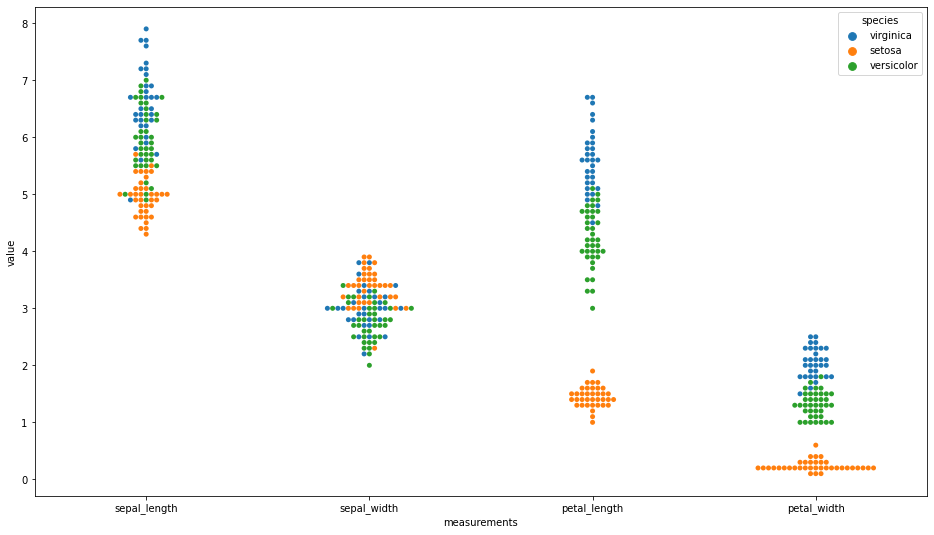

In [48]:
plt.figure(figsize=(16, 9))
sns.swarmplot(x='measurements', y='value', data=iris_melt, hue='species')

* ### Takeaways
    * petal length and petal width have pretty distinct groupings for each species so these would probably make good features
    * sepal width has the least distinct groupings

# Create 4 subplots (2 rows x 2 columns) of scatterplots

* sepal_length x sepal_width
* petal_length x petal_width
* sepal_area x petal_area
* sepal_length x petal_length
* Make your figure size 14 x 8. What are your takeaways?

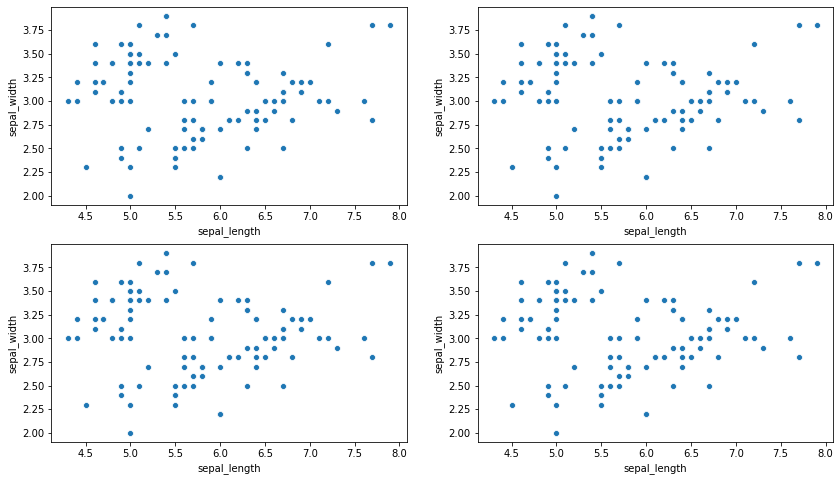

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

sns.scatterplot('sepal_length', 'sepal_width', data=train, ax=axs[0][0])
sns.scatterplot('sepal_length', 'sepal_width', data=train, ax=axs[0][1])
sns.scatterplot('sepal_length', 'sepal_width', data=train, ax=axs[1][0])
sns.scatterplot('sepal_length', 'sepal_width', data=train, ax=axs[1][1])

## Create a heatmap of each variable layering correlation coefficient on top.

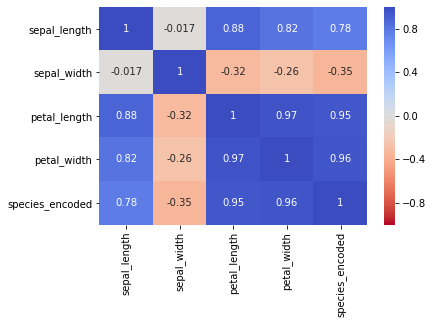

In [50]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm_r', vmin=-1, vmax=1)

## Create a scatter matrix visualizing the interaction of each variable



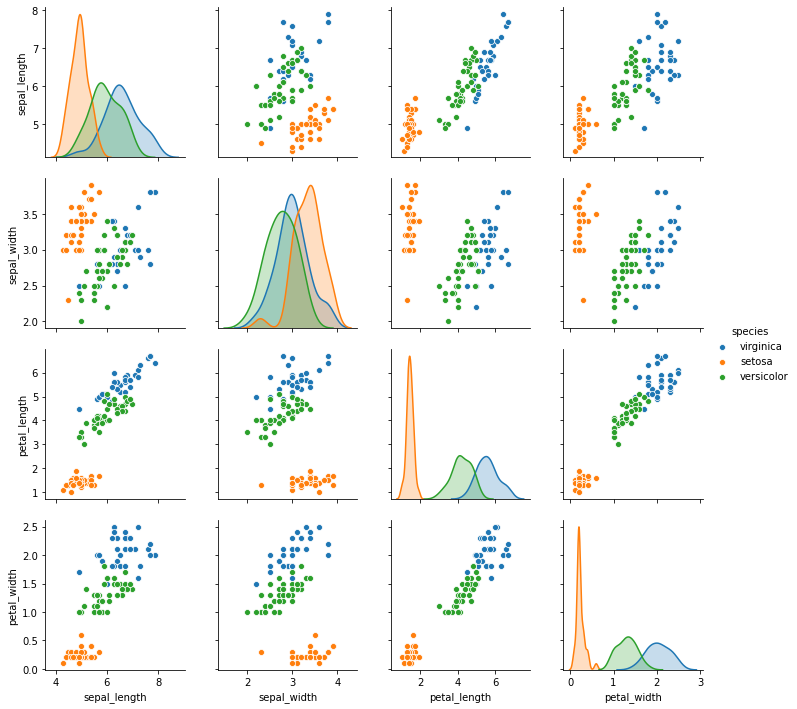

In [51]:
sns.pairplot(train.drop(columns='species_encoded'), hue='species')

## Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

$H_0$: The means of sepal length of virginica and versicolor are the same.

$H_a$: The means of sepal length of virginica and versicolor are different.

$\alpha$ = 0.05

In [53]:
virginica_sepal_length = train.sepal_length[train.species == 'virginica']
versicolor_sepal_length = train.sepal_length[train.species == 'versicolor']

tstat, p = stats.ttest_ind(virginica_sepal_length, versicolor_sepal_length)
print('tstat = ', tstat)
print('p-value = ', p)

tstat =  4.2670316099578205
p-value =  6.370171741842728e-05


In [54]:
alpha = 0.05

p < alpha

True

### So we reject the null hypothesis.